In [1]:
import glob
import sys
sys.path.append('../')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from mpi4py import MPI
comm = MPI.COMM_WORLD
import cartopy.crs as ccrs
from dedalus.extras import plot_tools
import logging
from matplotlib.animation import FFMpegWriter
logger = logging.getLogger(__name__)

# Parameters
first_frame = 1
#last_frame = 8
figsize = (6, 3)
dpi = 300
show_time = True
gridlines = True
coastlines = False
edgecolor = 'k'
proj = ccrs.PlateCarree(central_longitude=0)#, central_latitude=30)
proj = ccrs.Mollweide(central_longitude=0)
proj = ccrs.Orthographic(central_longitude=0, central_latitude=30)
#fields = ['p','om','vth','vph']
fields = ['v_ph']
#input_folder = sys.argv[1]
#output_folder = sys.argv[2]
STRNAME = "sphere81"
input_folder = "../data/%s" %(STRNAME)
output_folder = "../videos"
Omega = 10

#count files in the input folder
last_frame = len(glob.glob1("".join([input_folder,'/']),"*.npz"))
#last_frame = 50
# Setup output folder
if comm.rank == 0:
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
comm.barrier()

Frame:1
Frame:2
Frame:3
Frame:4
Frame:5
Frame:6
Frame:7
Frame:8
Frame:9
Frame:10
Frame:11
Frame:12
Frame:13
Frame:14
Frame:15
Frame:16
Frame:17
Frame:18
Frame:19
Frame:20
Frame:21
Frame:22
Frame:23
Frame:24
Frame:25
Frame:26
Frame:27
Frame:28
Frame:29
Frame:30
Frame:31
Frame:32
Frame:33
Frame:34
Frame:35
Frame:36
Frame:37
Frame:38
Frame:39
Frame:40
Frame:41
Frame:42
Frame:43
Frame:44
Frame:45
Frame:46
Frame:47
Frame:48
Frame:49
Frame:50
Frame:51
Frame:52
Frame:53
Frame:54
Frame:55
Frame:56
Frame:57
Frame:58
Frame:59
Frame:60
Frame:61
Frame:62
Frame:63
Frame:64
Frame:65
Frame:66
Frame:67
Frame:68
Frame:69
Frame:70
Frame:71
Frame:72
Frame:73
Frame:74
Frame:75
Frame:76
Frame:77
Frame:78
Frame:79
Frame:80
Frame:81
Frame:82
Frame:83
Frame:84
Frame:85
Frame:86
Frame:87
Frame:88
Frame:89
Frame:90
Frame:91
Frame:92
Frame:93
Frame:94
Frame:95
Frame:96
Frame:97
Frame:98
Frame:99
Frame:100
Frame:101
Frame:102
Frame:103
Frame:104
Frame:105
Frame:106
Frame:107
Frame:108
Frame:109
Frame:110
Frame:11

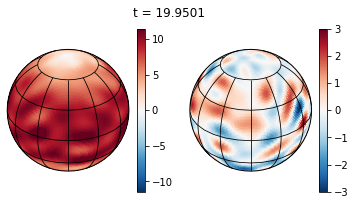

In [2]:
#set clims for all the fields
max_vals = {key: 0 for key in fields}
clims = {key: 0 for key in fields}
for field in fields:
    for i in range(first_frame + comm.rank, last_frame + 1, comm.size):
        with np.load("".join([input_folder, '/output_%i.npz' %i])) as file:
            fieldval = file[field]
            max_vals[field] = max(max_vals[field], np.max(fieldval))

for field in fields:
    clims[field] = 0.75*max_vals[field]

metadata = dict(title='Fields Movie', artist='Matplotlib', comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

for field in fields:
    
    # Setup figure projection
    fig, axs = plt.subplots(1,2, figsize=figsize, subplot_kw={'projection': proj})

    with writer.saving(fig, "%s/%s_%s_inertial.mp4" %(output_folder, STRNAME, field), dpi):
        for i in range(first_frame + comm.rank, last_frame + 1, comm.size):

            # Load data
            print('Frame:%i'%(i))
            for axes in axs:
                axes.cla()

            with np.load("".join([input_folder, '/output_%i.npz' %i])) as file:
                if i == first_frame + comm.rank:
                    phi = file['phi']
                    theta = file['theta']
                time = file['t'][0]
                thth, phiphi = np.meshgrid(theta, phi)

                data = file[field]
                signs = [0, -1]
                count = 0
                for axes in axs:
                    sign = signs[count]; count += 1
                    # Create plot
                    #if i == first_frame + comm.rank:
                    lon = (phi + phi[1]/2 - np.pi + sign*Omega*time) * 180 / np.pi
                    lat = (np.pi/2 - theta) * 180 / np.pi
                    xmesh, ymesh = plot_tools.quad_mesh(lon, lat)
                    if field=='v_ph':
                        data_mod = data + sign*Omega*np.sin(thth)
                    else:
                        data_mod = data + 2*sign*Omega*np.cos(thth)
                        
                    image = axes.pcolormesh(xmesh, ymesh, data_mod.T, cmap='RdBu_r', transform=ccrs.PlateCarree())
                    if show_time:
                        title = fig.suptitle('t = %.4f' %time)
                    if gridlines:
                        axes.gridlines(xlocs=np.arange(0, 361, 30), ylocs=np.arange(-60, 61, 30), color='k')

                    axes.set_global()
                    axes.outline_patch.set_edgecolor(edgecolor)
                    
                    
                    if show_time:
                            title.set_text('t = %.4f' %time)
                    if clims:
                        image.set_clim(-clims[field], clims[field])
                        if sign!=0: image.set_clim(-3, 3)
                    else:
                        clim_i = np.max(np.abs(data))
                        image.set_clim(-clim_i, clim_i)
                        
                    if i == first_frame + comm.rank:
                        fig.colorbar(image, ax=axes)

            writer.grab_frame()


6.398291665158624


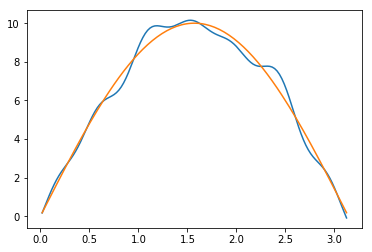

In [17]:
with np.load("".join([input_folder, '/output_%i.npz' %39])) as file:
    phi = file['phi']
    theta = file['theta']
    om = file['om']
    v_ph = file['v_ph']
    
plt.plot(theta, v_ph[0,:])
plt.plot(theta, 10*np.sin(theta))
print(np.mean(v_ph[0,:]))
    